In [41]:
import tensorflow as tf
import matplotlib
import cv2
import numpy as np
from tensorflow.keras import layers, models
from google.colab import files
import zipfile
import os
import shutil
from google.colab import drive
import matplotlib.pyplot as plt

In [42]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [43]:
# Extract the file folder from the zipfile from mydrive
with zipfile.ZipFile("/content/drive/MyDrive/archive.zip", "r") as zip_ref:
  zip_ref.extractall("/content/3D_Object_Recognition_Data")

In [44]:
# Check the files in the folder
!ls /content/3D_Object_Recognition_Data

annotations  images  metadata.csv


In [45]:
# Display the image data
!ls /content/3D_Object_Recognition_Data/images/

01E392EE-69F9-4E33-BFCE-E5C968654078.jpeg
03BF7561-A9BA-4C3C-B8A0-D3E585F73F3C.jpeg
1312A392-67A3-4EBF-9319-810CF6DA5EF6.jpeg
16654_1_1.png
16654_2_1.jpg
16654_4_1.jpg
16660_1_1.jpg
16660_2_1.jpg
16660_3_1.jpg
16660_4_1.jpg
16660_5_1.jpg
16663_1_1.jpg
16663_1_2.jpg
16664_1_1.jpg
16664_2_1.jpg
16669_1_1.jpeg
16669_3_1.jpeg
16672_1_1.jpg
16673_2_1.jpg
16674_1_1.jpg
16691_1_1.jpg
16706_1_1.png
16708_1_1.jpg
16708_4_1.jpg
16708_5_1.jpg
16724_1_1.jpg
171CB377-62FF-4B76-906C-F3787A01CB2E.jpeg
191F3B3A-2879-4EF3-BE56-EE0D2B5AAEE3.jpeg
1B734A89-A1BF-49A8-A1D3-66FAFA4FAC5D.jpeg
1.CXRCTThoraximagesofCOVID-19fromSingapore.pdf-000-fig1a.png
1.CXRCTThoraximagesofCOVID-19fromSingapore.pdf-000-fig1b.png
1.CXRCTThoraximagesofCOVID-19fromSingapore.pdf-001-fig2a.png
1.CXRCTThoraximagesofCOVID-19fromSingapore.pdf-001-fig2b.png
1.CXRCTThoraximagesofCOVID-19fromSingapore.pdf-002-fig3a.png
1.CXRCTThoraximagesofCOVID-19fromSingapore.pdf-002-fig3b.png
1.CXRCTThoraximagesofCOVID-19fromSingapore.pdf-003-fig4a.p

In [46]:
image_list = []
image_dir = "/content/3D_Object_Recognition_Data/images/"
for file in os.listdir(image_dir):
  image = cv2.imread(os.path.join(image_dir, file), cv2.IMREAD_COLOR)
  image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  image_list.append(image_rgb)
  print(image_list)

Streaming output truncated to the last 5000 lines.

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8), array([[[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[40, 40, 40],
        [44, 44, 44],
        [41, 41, 41],
        ...,
        [73, 73, 73],
        [71, 71, 71],
        [70, 70, 70]],

       ...,

       [[22, 22, 22],
        [19, 19, 19],
        [18, 18, 18],
        ...,
        [15, 15, 15],
        [15, 15, 15],
        [14, 14, 14]],

       [[20, 20, 20],
        [18, 18, 18],
        [17, 17, 17],
        ...,
        [14, 14, 14],
        [14, 14, 14],
        [14, 14, 14]],

       [[20, 20, 20],

In [47]:
print(image.shape)

(913, 994, 3)


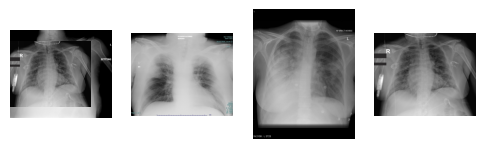

In [48]:
# Visualize the images
plt.figure(figsize=(6,7))
for i in range(min(4, len(image_list))):
  plt.subplot(1,4,i+1)
  plt.imshow(image_list[i])
  plt.axis("off")
  plt.subplot(1,5,1)
  plt.imshow(image_list[i])
  plt.axis("off")
plt.show()

In [49]:
%cd /content/drive/MyDrive/AI-Driven-3D-Medical-Imaging/

/content/drive/MyDrive/AI-Driven-3D-Medical-Imaging


In [50]:
!git add .

In [51]:
!git status

On branch main
Your branch is up to date with 'origin/main'.

nothing to commit, working tree clean


In [52]:
!git commit -m "Image dataset loaded"

On branch main
Your branch is up to date with 'origin/main'.

nothing to commit, working tree clean


In [53]:
!ls


LICENSE  README.md


In [54]:
%cd /content/drive/MyDrive/AI-Driven-3D-Medical-Imaging
!ls -la


/content/drive/MyDrive/AI-Driven-3D-Medical-Imaging
total 6
drwx------ 8 root root 4096 Jul 23 22:28 .git
-rw------- 1 root root 1071 Jul 23 22:16 LICENSE
-rw------- 1 root root  333 Jul 23 22:16 README.md


In [ ]:
!mv "/content/drive/MyDrive/Colab Notebooks/3D_image.ipynb" "/content/drive/MyDrive/AI-Driven-3D-Medical-Imaging/"
